In [67]:
import Boost
import Kernel
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold

## Import Data

In [55]:
concrete_df = pd.read_excel('Data/Concrete_Data.xls')
concrete_X = np.array(concrete_df.iloc[:,:-1])
concrete_y = np.array(concrete_df.iloc[:,-1])
concrete_y.shape = (concrete_y.shape[0],1)
lambda_val_list = [0.01,0.1,1,10]

In [61]:
class KernelBoostAbsolute:

    def __init__(self, kernel_func, lambda_val=0.1, nu_val=10, sigma_sq_val=1, solver=cp.SCS):
        """
        :lambda_val = Regularization parameter
        :nu_val = number of boosting rounds
        :sigma_sq_val = Typically 1. Value only matters relative to value of lambda.

        """
        assert lambda_val > 0.0
        assert nu_val > 0
        assert sigma_sq_val > 0
        self.lambda_val = lambda_val
        self.nu_val = nu_val
        self.sigma_sq_val = sigma_sq_val
        self.kernel_func = kernel_func
        self.theta_hat_boost = None
        self.solver = solver
        self.X = None

    def fit(self, X, y):
        """
        """
        self.X = X 

        K = self.kernel_func(self.X, self.X)
        V, D, _ = np.linalg.svd(K)
        Reg_Mat = self.sigma_sq_val*V @ ( 
            np.diag(np.power(D*self.lambda_val/self.sigma_sq_val+1, self.nu_val ) - np.ones(D.shape[0])+0.00000001) #0.00..1 added for numerical stability
                      ) @ V.T

        b_cvx = cp.Variable(shape=(X.shape[0],1))
        regularization_term = cp.quad_form(b_cvx, Reg_Mat)
        optimzer_term = cp.sum(cp.abs(y - Reg_Mat @ b_cvx)) + cp.quad_form(b_cvx, Reg_Mat)
        objective = cp.Minimize(optimzer_term)
        prob = cp.Problem(objective)
        prob.solve(solver=self.solver)
        self.theta_hat_boost = np.linalg.pinv(K) @ Reg_Mat @ b_cvx.value # b_cvx.value

    def predict(self, X):
        """
        """
        K = self.kernel_func(X, self.X)
        y_pred = K @ self.theta_hat_boost
        return y_pred


In [82]:
KBA = KernelBoostAbsolute(Kernel.Gaussian_Kernel,lambda_val=0.01, nu_val=4, sigma_sq_val=1)
KBA.fit(concrete_X, concrete_y)

## Kernel Boost

In [87]:
processing_summary = []

for lambda_val in lambda_val_list:
    for nu_val in np.linspace(1,10,10):
        error_summary = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(heart_X):
            train_X, test_X = concrete_X[train_idx], concrete_X[test_idx]
            train_y, test_y = concrete_y[train_idx], concrete_y[test_idx]
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)            
            conrete_kb = KernelBoostAbsolute(Kernel.Gaussian_Kernel,lambda_val=lambda_val, nu_val=nu_val, sigma_sq_val=1)
            conrete_kb.fit(train_X, train_y)
            error_summary.append(mean_absolute_error(test_y, conrete_kb.predict(test_X)).flatten() )
        mean_error = np.mean(error_summary)
        print('lambda=',lambda_val,'nu=',nu_val,'mean_abs_error=', mean_error)
        processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'mean_abs_error': mean_error}
    )

lambda= 1 nu= 1.0 mean_abs_error= 35.68989614904405
lambda= 1 nu= 2.0 mean_abs_error= 35.368383487514826
lambda= 1 nu= 3.0 mean_abs_error= 34.52116834468901
lambda= 1 nu= 4.0 mean_abs_error= 32.87299867685354
lambda= 1 nu= 5.0 mean_abs_error= 31.337524697501465
lambda= 1 nu= 6.0 mean_abs_error= 29.510303302157105
lambda= 1 nu= 7.0 mean_abs_error= 28.545280823208373
lambda= 1 nu= 8.0 mean_abs_error= 28.494619222806023


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 9.0 mean_abs_error= 28.4940275391414


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 1 nu= 10.0 mean_abs_error= 28.49926383817637
lambda= 10 nu= 1.0 mean_abs_error= 34.53833607477465
lambda= 10 nu= 2.0 mean_abs_error= 28.551748936001708
lambda= 10 nu= 3.0 mean_abs_error= 28.493657112495033


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 4.0 mean_abs_error= 28.473486093433372


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 5.0 mean_abs_error= 28.473307950858537


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var10358, [[ 1.77156000e+06  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.77156000e+06  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.77156000e+06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.11903066e+07
  -1.57920104e-09 -1.19406492e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.57920104e-09
   2.14534616e+07 -1.10958296e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.19406492e-08
  -1.10958296e-09  1.03659271e+07]])

In [91]:
out_processing_summary = processing_summary[:16]+processing_summary[22:]
kernel_res_df = pd.DataFrame(out_processing_summary)
kernel_res_df.to_csv('concrete_kernel_boost.csv')

In [99]:
iterative_processing_summary = []
lambda_val_list = [0.01,0.1,1,10]

for lambda_val in lambda_val_list:
    for nu_val in range(1,11):
        error_summary = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(heart_X):
            train_X, test_X = concrete_X[train_idx], concrete_X[test_idx]
            train_y, test_y = concrete_y[train_idx], concrete_y[test_idx]
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)            
            conrete_kb = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel,loss_type='absolute',lambda_val=lambda_val, nu_val=nu_val, sigma_sq_val=1)
            conrete_kb.fit(train_X, train_y)
            error_summary.append(mean_absolute_error(test_y, conrete_kb.predict(test_X)).flatten() )
        mean_error = np.mean(error_summary)
        print('lambda=',lambda_val,'nu=',nu_val,'mean_abs_error=', mean_error)
        iterative_processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'mean_abs_error': mean_error}
    )

lambda= 0.01 nu= 1 mean_abs_error= 35.81655401401973
lambda= 0.01 nu= 2 mean_abs_error= 35.815272193517174
lambda= 0.01 nu= 3 mean_abs_error= 35.81399085804682
lambda= 0.01 nu= 4 mean_abs_error= 35.812709906281206
lambda= 0.01 nu= 5 mean_abs_error= 35.81142873769117
lambda= 0.01 nu= 6 mean_abs_error= 35.810153858142186
lambda= 0.01 nu= 7 mean_abs_error= 35.80887409419025
lambda= 0.01 nu= 8 mean_abs_error= 35.80759431702289
lambda= 0.01 nu= 9 mean_abs_error= 35.806321139479145
lambda= 0.01 nu= 10 mean_abs_error= 35.805042417376775
lambda= 0.1 nu= 1 mean_abs_error= 35.8050407921466
lambda= 0.1 nu= 2 mean_abs_error= 35.79224658402614
lambda= 0.1 nu= 3 mean_abs_error= 35.779451574559026
lambda= 0.1 nu= 4 mean_abs_error= 35.766656537929336
lambda= 0.1 nu= 5 mean_abs_error= 35.75386122601588
lambda= 0.1 nu= 6 mean_abs_error= 35.741067970434294
lambda= 0.1 nu= 7 mean_abs_error= 35.72827414488638
lambda= 0.1 nu= 8 mean_abs_error= 35.71548495750915
lambda= 0.1 nu= 9 mean_abs_error= 35.702691254

In [100]:
iterative_kernel_res_df = pd.DataFrame(iterative_processing_summary)
iterative_kernel_res_df.to_csv('concrete_iterative_boost.csv')

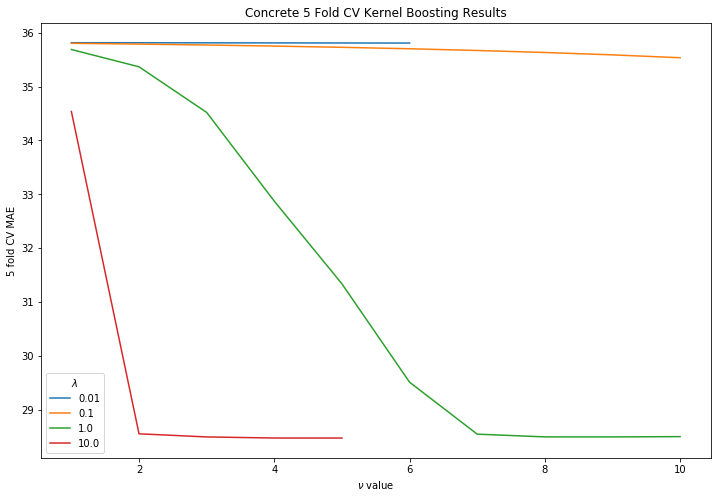

In [149]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)

for lambda_val, df in kernel_res_df.groupby('lambda_val'):
    ax.plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

ax.legend(title=r'$\lambda$')
plt.title('Concrete 5 Fold CV Kernel Boosting Results')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV MAE')
fig.savefig('images/concrete-kb.png')

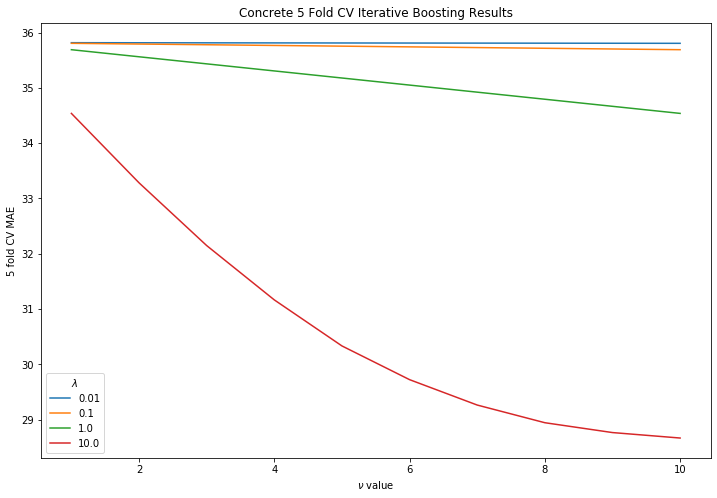

In [150]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)

for lambda_val, df in iterative_kernel_res_df.groupby('lambda_val'):
    ax.plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

ax.legend(title=r'$\lambda$')
plt.title('Concrete 5 Fold CV Iterative Boosting Results')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV MAE')
fig.savefig('images/concrete-ib.png')

In [152]:
kernel_res_df.loc[:,'Algo_Type'] = 'Kernel Boosting'
iterative_kernel_res_df.loc[:,'Algo_Type'] = 'Iterative Boosting'
combined_df = pd.concat([iterative_kernel_res_df,kernel_res_df])

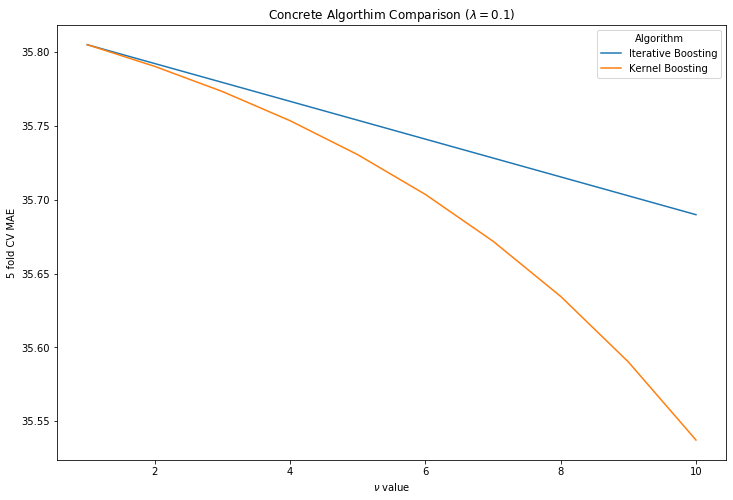

In [153]:
combined_ex_one_df = combined_df[combined_df.lambda_val==0.1]

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)

for lambda_val, df in combined_ex_one_df.groupby('Algo_Type'):
    ax.plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

ax.legend(title=r'Algorithm')
plt.title(r'Concrete Algorthim Comparison ($\lambda=0.1$)')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV MAE')

fig.savefig('images/concrete-algo-comp-1.png')

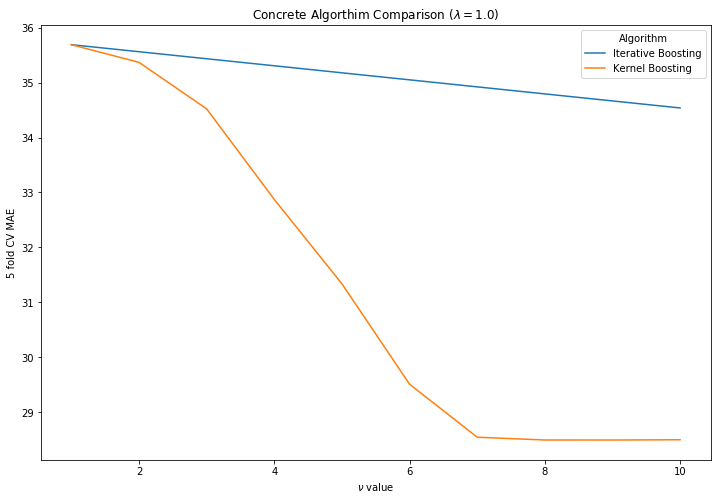

In [154]:
combined_ex_one_df = combined_df[combined_df.lambda_val==1.0]

fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)

for lambda_val, df in combined_ex_one_df.groupby('Algo_Type'):
    ax.plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

ax.legend(title=r'Algorithm')
plt.title(r'Concrete Algorthim Comparison ($\lambda=1.0$)')
plt.xlabel(r'$\nu$ value')
plt.ylabel('5 fold CV MAE')

fig.savefig('images/concrete-algo-comp-2.png')

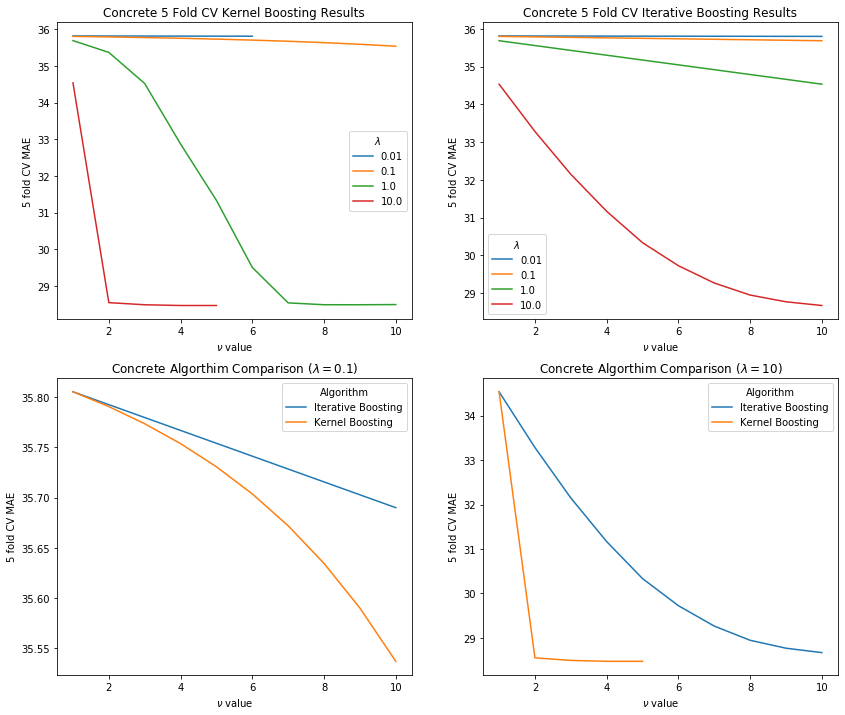

In [158]:
#fig = plt.figure(figsize=[12,8])
fig, axs = plt.subplots(2, 2, figsize=[14,12])

#
for lambda_val, df in kernel_res_df.groupby('lambda_val'):
    axs[0,0].plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

axs[0,0].legend(title=r'$\lambda$')
axs[0,0].set_title('Concrete 5 Fold CV Kernel Boosting Results')
axs[0,0].set_xlabel(r'$\nu$ value')
axs[0,0].set_ylabel('5 fold CV MAE')

#
for lambda_val, df in iterative_kernel_res_df.groupby('lambda_val'):
    axs[0,1].plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

axs[0,1].legend(title=r'$\lambda$')
axs[0,1].set_title('Concrete 5 Fold CV Iterative Boosting Results')
axs[0,1].set_xlabel(r'$\nu$ value')
axs[0,1].set_ylabel('5 fold CV MAE')

#
combined_ex_one_df = combined_df[combined_df.lambda_val==0.1]

for lambda_val, df in combined_ex_one_df.groupby('Algo_Type'):
    axs[1,0].plot(df['nu_val'],df['mean_abs_error'],label=lambda_val)

axs[1,0].legend(title=r'Algorithm')
axs[1,0].set_title(r'Concrete Algorthim Comparison ($\lambda=0.1$)')
axs[1,0].set_xlabel(r'$\nu$ value')
axs[1,0].set_ylabel('5 fold CV MAE')

#
combined_ex_two_df = combined_df[combined_df.lambda_val==10]

for lambda_val, df in combined_ex_two_df.groupby('Algo_Type'):
    axs[1,1].plot(df['nu_val'], df['mean_abs_error'], label=lambda_val)

axs[1,1].legend(title=r'Algorithm')
axs[1,1].set_title(r'Concrete Algorthim Comparison ($\lambda=10$)')
axs[1,1].set_xlabel(r'$\nu$ value')
axs[1,1].set_ylabel('5 fold CV MAE')
fig.savefig('images/concrete-all.png', bbox_inches='tight')

# Compare Computational Time

Only need to do this for one dataset. Might as well use Ionosphere?

In [ ]:
import time

In [ ]:
for lambda_val in lambda_val_list:
    for nu_val in range(1,11):
        error_summary = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(heart_X):
            train_X, test_X = concrete_X[train_idx], concrete_X[test_idx]
            train_y, test_y = concrete_y[train_idx], concrete_y[test_idx]
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)
            conrete_kb = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel, loss_type='absolute', lambda_val=lambda_val, nu_val=nu_val, sigma_sq_val=1)
            conrete_kb.fit(train_X, train_y)
            error_summary.append(mean_absolute_error(test_y, conrete_kb.predict(test_X)).flatten() )
        mean_error = np.mean(error_summary)
        print('lambda=',lambda_val,'nu=',nu_val,'mean_abs_error=', mean_error)
        iterative_processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'mean_abs_error': mean_error}
    )

In [127]:
processing_summary = []

for lambda_val in [0.1]:
    for nu_val in np.linspace(1,10,10): #np.linspace(11, 15, 5):
        time_summary = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        process_time = []
        for train_idx, test_idx in kfold.split(heart_X):
            start_time = start_time = time.time()
            train_X, test_X = concrete_X[train_idx], concrete_X[test_idx]
            train_y, test_y = concrete_y[train_idx], concrete_y[test_idx]
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)
            conrete_kb = KernelBoostAbsolute(Kernel.Gaussian_Kernel,lambda_val=lambda_val, nu_val=nu_val, sigma_sq_val=1)
            conrete_kb.fit(train_X, train_y)
            end_time = time.time() - start_time
            process_time.append(end_time)

        mean_time = np.mean(process_time)
        print('nu=',nu_val,'time (sec)=', mean_time)
        processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'mean_time': mean_time,'process_time':process_time}
            )

nu= 1.0 time (sec)= 10.487398290634156
nu= 2.0 time (sec)= 10.607927417755127
nu= 3.0 time (sec)= 10.065630054473877
nu= 4.0 time (sec)= 10.266305780410766
nu= 5.0 time (sec)= 9.877716016769408
nu= 6.0 time (sec)= 9.87245488166809
nu= 7.0 time (sec)= 11.115502405166627
nu= 8.0 time (sec)= 9.963708543777466
nu= 9.0 time (sec)= 10.492149353027344
nu= 10.0 time (sec)= 10.297309684753419


In [125]:
iterative_time_summary = []

for lambda_val in [0.1]:
    for nu_val in range(11,16): #range(1,11): # range(11,16):
        time_summary = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        process_time = []
        for train_idx, test_idx in kfold.split(heart_X):
            start_time = start_time = time.time()
            train_X, test_X = concrete_X[train_idx], concrete_X[test_idx]
            train_y, test_y = concrete_y[train_idx], concrete_y[test_idx]
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)            
            conrete_kb = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel, loss_type='absolute', lambda_val=lambda_val, nu_val=nu_val, sigma_sq_val=1)
            conrete_kb.fit(train_X, train_y)
            end_time = time.time() - start_time
            process_time.append(end_time)

        mean_time = np.mean(process_time)
        print('nu=',nu_val,'time (sec)=', mean_time)
        iterative_time_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'mean_time': mean_time,'process_time':process_time}
    )

nu= 11 time (sec)= 9.82890281677246
nu= 12 time (sec)= 11.286700963973999
nu= 13 time (sec)= 12.059111928939819
nu= 14 time (sec)= 12.932773971557618
nu= 15 time (sec)= 14.560065269470215


In [126]:
processing_summary

[{'lambda_val': 0.1,
  'mean_time': 1.0980982780456543,
  'nu_val': 1,
  'process_time': [0.9538130760192871,
   1.0952692031860352,
   0.8311161994934082,
   1.6287989616394043,
   0.9814939498901367]},
 {'lambda_val': 0.1,
  'mean_time': 1.9417494297027589,
  'nu_val': 2,
  'process_time': [1.574995994567871,
   2.164005994796753,
   1.565505027770996,
   2.6698849201202393,
   1.7343552112579346]},
 {'lambda_val': 0.1,
  'mean_time': 2.85391788482666,
  'nu_val': 3,
  'process_time': [2.280565023422241,
   3.032654047012329,
   2.315685272216797,
   3.9345180988311768,
   2.706166982650757]},
 {'lambda_val': 0.1,
  'mean_time': 3.860476779937744,
  'nu_val': 4,
  'process_time': [3.007642984390259,
   4.5244550704956055,
   3.199744939804077,
   5.204243898391724,
   3.3662970066070557]},
 {'lambda_val': 0.1,
  'mean_time': 4.566278648376465,
  'nu_val': 5,
  'process_time': [3.914727210998535,
   4.7678611278533936,
   3.682126998901367,
   6.488001823425293,
   3.9786760807037354]

In [138]:
iter_boost_time = [
{'lambda_val':0.1, 'nu_val':1, 'mean_time': 1.0980982780456543},
{'lambda_val':0.1, 'nu_val':2, 'mean_time': 1.9417494297027589},
{'lambda_val':0.1, 'nu_val':3, 'mean_time': 2.85391788482666}  ,
{'lambda_val':0.1, 'nu_val':4, 'mean_time': 3.860476779937744} ,
{'lambda_val':0.1, 'nu_val':5, 'mean_time': 4.566278648376465} ,
{'lambda_val':0.1, 'nu_val':6, 'mean_time': 5.524286842346191} ,
{'lambda_val':0.1, 'nu_val':7, 'mean_time': 6.694547700881958} ,
{'lambda_val':0.1, 'nu_val':8, 'mean_time': 7.820108079910279} ,
{'lambda_val':0.1, 'nu_val':9, 'mean_time': 8.720431423187256} ,
{'lambda_val':0.1, 'nu_val':10, 'mean_time': 9.100590419769286},
{'lambda_val':0.1, 'nu_val':11, 'mean_time': 9.82890281677246} ,
{'lambda_val':0.1, 'nu_val':12, 'mean_time': 9.100590419769286} ,
{'lambda_val':0.1, 'nu_val':13, 'mean_time': 12.059111928939819},
{'lambda_val':0.1, 'nu_val':14, 'mean_time': 12.932773971557618},
{'lambda_val':0.1, 'nu_val':15, 'mean_time': 14.560065269470215}
    ]

iter_boost_time_df = pd.DataFrame(iter_boost_time)
iter_boost_time_df['Algo_Type'] = 'Iterative Boosting'

In [136]:
kernel_boost_time = [   
{'lambda_val':0.1, 'nu_val':1, 'mean_time': 10.487398290634156},
{'lambda_val':0.1, 'nu_val':2, 'mean_time': 10.607927417755127},
{'lambda_val':0.1, 'nu_val':3, 'mean_time': 10.065630054473877}  ,
{'lambda_val':0.1, 'nu_val':4, 'mean_time': 10.266305780410766} ,
{'lambda_val':0.1, 'nu_val':5, 'mean_time': 9.877716016769408} ,
{'lambda_val':0.1, 'nu_val':6, 'mean_time': 9.87245488166809} ,
{'lambda_val':0.1, 'nu_val':7, 'mean_time': 11.115502405166627} ,
{'lambda_val':0.1, 'nu_val':8, 'mean_time': 9.963708543777466} ,
{'lambda_val':0.1, 'nu_val':9, 'mean_time': 10.492149353027344} ,
{'lambda_val':0.1, 'nu_val':10, 'mean_time': 10.297309684753419},
{'lambda_val':0.1, 'nu_val':11, 'mean_time': 10.394083786010743} ,
{'lambda_val':0.1, 'nu_val':12, 'mean_time': 9.832894372940064} ,
{'lambda_val':0.1, 'nu_val':13, 'mean_time': 9.779872131347656},
{'lambda_val':0.1, 'nu_val':14, 'mean_time': 10.048231220245361},
{'lambda_val':0.1, 'nu_val':15, 'mean_time': 9.782122468948364}
]

kernel_boost_time_df = pd.DataFrame(kernel_boost_time)
kernel_boost_time_df.loc[:,'Algo_Type'] = 'Kernel Boosting'

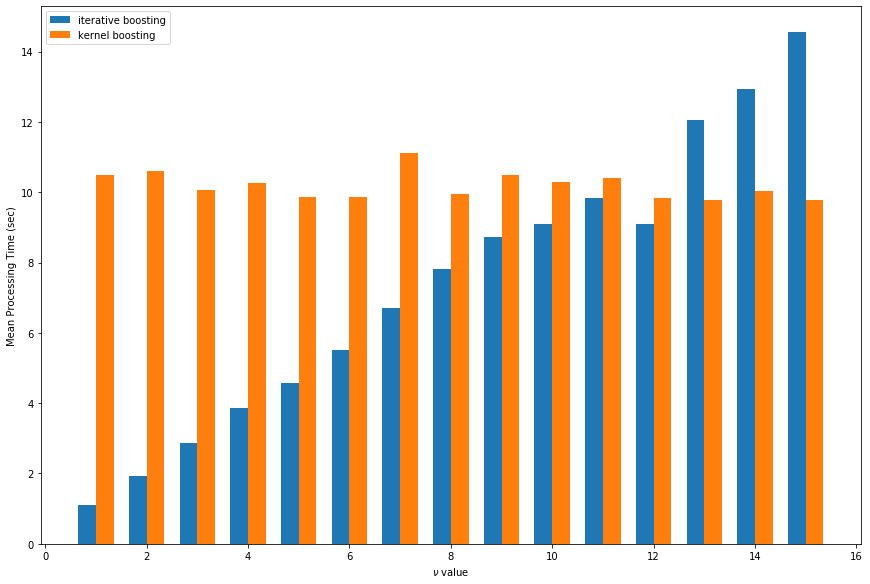

In [159]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[12,8])
rects1 = ax.bar(iter_boost_time_df.nu_val - width/2, iter_boost_time_df.mean_time, width, label='iterative boosting')
rects2 = ax.bar(kernel_boost_time_df.nu_val + width/2, kernel_boost_time_df.mean_time, width, label='kernel boosting')

fig.tight_layout()
plt.xlabel(r'$\nu$ value')
plt.ylabel('Mean Processing Time (sec)')
plt.legend()
plt.show()
fig.savefig('images/concrete-time-comp.png', bbox_inches='tight')

In [146]:
kernel_boost_time_df.to_csv('concrete_kernel_process_time.csv')
iter_boost_time_df.to_csv('concrete_iterative_process_time.csv')